<a href="https://colab.research.google.com/github/AlbionKransiqi/Capstone/blob/main/YOLOv3_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import tensorflow as tf
from glob import glob

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import h5py
import sklearn

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
train_path = "/content/drive/My Drive/capstone_data/train_zip/train/"
test_path= "/content/drive/My Drive/capstone_data/test_zip/test/"

In [219]:
import cv2

In [220]:
weights = "./yolov3.weights"

cfg = "./yolov3.cfg"

names = "./coco.names"

In [221]:
# load the yolov3 model
net = cv2.dnn.readNet(weights, cfg)
classes = []
with open('./coco.names', 'r') as f:
    classes = f.read().splitlines()

In [222]:
# for image in images:
from os import walk

train_path = '/content/drive/My Drive/capstone_data/train_zip/train'
test_path = '/content/drive/My Drive/capstone_data/test_zip/test'

images = []
for (dirpath, dirnames, filenames) in walk(train_path):
    images.append(filenames)

In [223]:
files_dir = sorted(glob("/content/drive/My Drive/capstone_data/train_zip/train/*"))
test_dir = sorted(glob("/content/drive/My Drive/capstone_data/test_zip/test/*"))

In [226]:
img = cv2.imread(test_dir[14])
width, height = img.shape[1], img.shape[0]
blob = cv2.dnn.blobFromImage(img, 1/256, (416, 416), (0, 0, 0), swapRB=True, crop=False)

net.setInput(blob)
output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_names)

boxes = []
confidences = []
class_ids = []

In [228]:
# loop over the layer output
# first to extract info form the layer output
# second loop extract info from each output
for output in layerOutputs:
  for detection in output:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
#      print(confidence)
    threshold = 0.5
    if confidence > threshold:
            # if confidence > 0.5 display the bbox
            # all this are normalized, we have to make it back to the original size
        center_x = int(detection[0]*width)
        center_y = int(detection[1]*height)
        w = int(detection[2]*width)
        h = int(detection[3]*height)
            # position of the upper left corner
        x = int(center_x - w/2)
        y = int(center_y - h/2)

        boxes.append([x, y, w, h])
        confidences.append(float(confidence))
        class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, threshold, 0.45) # threshold - maximum suppression

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

In [229]:
boxes

[[0, -3, 234, 242],
 [208, 0, 340, 228],
 [524, 41, 320, 326],
 [68, 84, 403, 384],
 [-5, 239, 249, 329],
 [436, 234, 327, 325],
 [745, 334, 100, 216]]

In [230]:
for i in indexes.flatten():
  x, y, w, h = boxes[i]
  print(x, y, w, h)
  label = str(classes[class_ids[i]])
  confidence = str(round(confidences[i], 2))
  color = colors[i]
  cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
  cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)


h, w, _ = img.shape

436 234 327 325
-5 239 249 329
68 84 403 384
208 0 340 228
524 41 320 326
745 334 100 216
0 -3 234 242


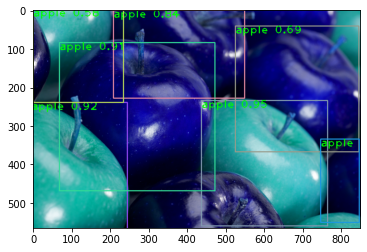

In [231]:
plt.imshow(img)

In [232]:
from tqdm import tqdm

# create submission
test_path = '/content/drive/My Drive/capstone_data/test_zip/test'
images = []
box_dict = {}
class_dict = {}
for file in test_dir:
  if "xml" not in file:
    i = file.split('/')[-1]
    images.append(i)

In [234]:
images_plots = []

for image in tqdm(images, total=len(images)):
    labels_r = []
    img = cv2.imread(test_path + "/" + str(image))
    width, height = img.shape[1], img.shape[0]
    blob = cv2.dnn.blobFromImage(img, 1/256, (416, 416), (0, 0, 0), swapRB=True, crop=False)

    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(output_layers_names)

    boxes = []
    confidences = []
    class_ids = []
    # loop over the layer output
    # first to extract info form the layer output
    # second loop extract info from each output
    for output in layerOutputs:
        for detection in output:
            # first four elements are the location of the bounding box
            # fifth element is the confidence
            # from sixth to end the object predictions
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
    #         print(confidence)
            threshold = 0.5
            if confidence > threshold:
                # if confidence > 0.5 display the bbox
                # all this are normalized, we have to make it back to the original size
                center_x = int(detection[0]*width)
                center_y = int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)
                # position of the upper left corner
                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    
    try:
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, threshold, 0.45) # threshold - maximum suppression

        font = cv2.FONT_HERSHEY_PLAIN
        colors = np.random.uniform(0, 255, size=(len(boxes), 3))

        for i in indexes.flatten():
            x, y, w, h = boxes[i]
#             print(x, y, w, h)
            label = str(classes[class_ids[i]])
            labels_r.append(label)
            confidence = str(round(confidences[i], 2))
            color = colors[i]
            cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
            cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)

        box_dict[image] = boxes
        class_dict[image] = labels_r
        images_plots.append(img)

        
    except:
        
        box_dict[image] = []
        class_dict[image] = []
        images_plots.append(0)

100%|██████████| 60/60 [02:09<00:00,  2.15s/it]


In [235]:
values = class_dict.values()
values_list = list(values)

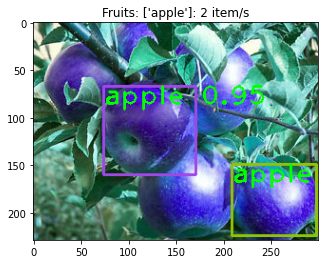

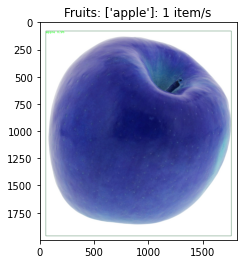

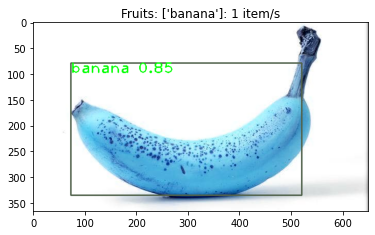

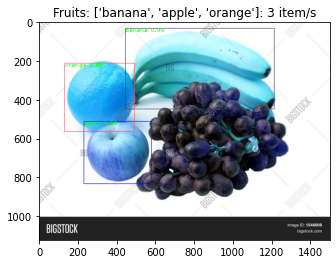

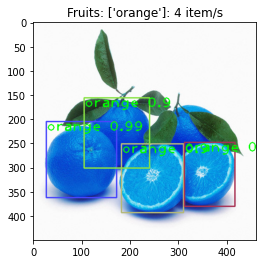

In [260]:
for i in range(0,60,13):
    image_plot = plt.imshow(images_plots[i])
    classes = list(set(values_list[i]))
    nr_items = len(values_list[i])
    plt.title(f"Fruits: {classes}: {nr_items} item/s")
    plt.show()